In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [25]:
from IPython.display import HTML

HTML('''
<script>
    code_show = false; // Hide code by default

    function code_toggle() {
        if (code_show){
            $('div.input').hide();
        } else {
            $('div.input').show();
        }
        code_show = !code_show;
    }

    $(document).ready(function(){
        $('div.input').hide(); // Hides code at load
    });
</script>

<form action="javascript:code_toggle()">
    <input type="submit" value="Toggle Code">
</form>
''')


## RibonanzaNet-SM_002
Here I split the training into a separate train and validation set. I used a sequence identiy of 75% and a word size of 5 with cd-hit. I saved sequences as SM_train_data_sequences.fasta, and SM_val_data_sequences.fasta.

Finetuning RibonanzaNet on absolute reactivity values of all conditions at once (including NoDr baseline) results
* From training on 2094 sequences, split training data into training and validation data.
* criterion: MAE
* epochs: 20
* train_snr_cutoff: 1
* val_snr_cutoff: 1
* training_script: SM_train_model_sim.py
* training data: SM_train_data.json
* validation data: SM_val_data.json
* test data: SM_test_data.json
* model saved as: RibonanzaNet-SM_002.pt
* sbatch script: sm_train_all_simultaneously.sbatch.sh
* Sherlock Job #: 56141252

In [26]:
df = pd.read_json('RibonanzaNet-SM_002_test_data_with_preds.json')

In [27]:
drug = input('Insert first four letters of drug, capitalize: ')

Insert first four letters of drug, capitalize: Mito


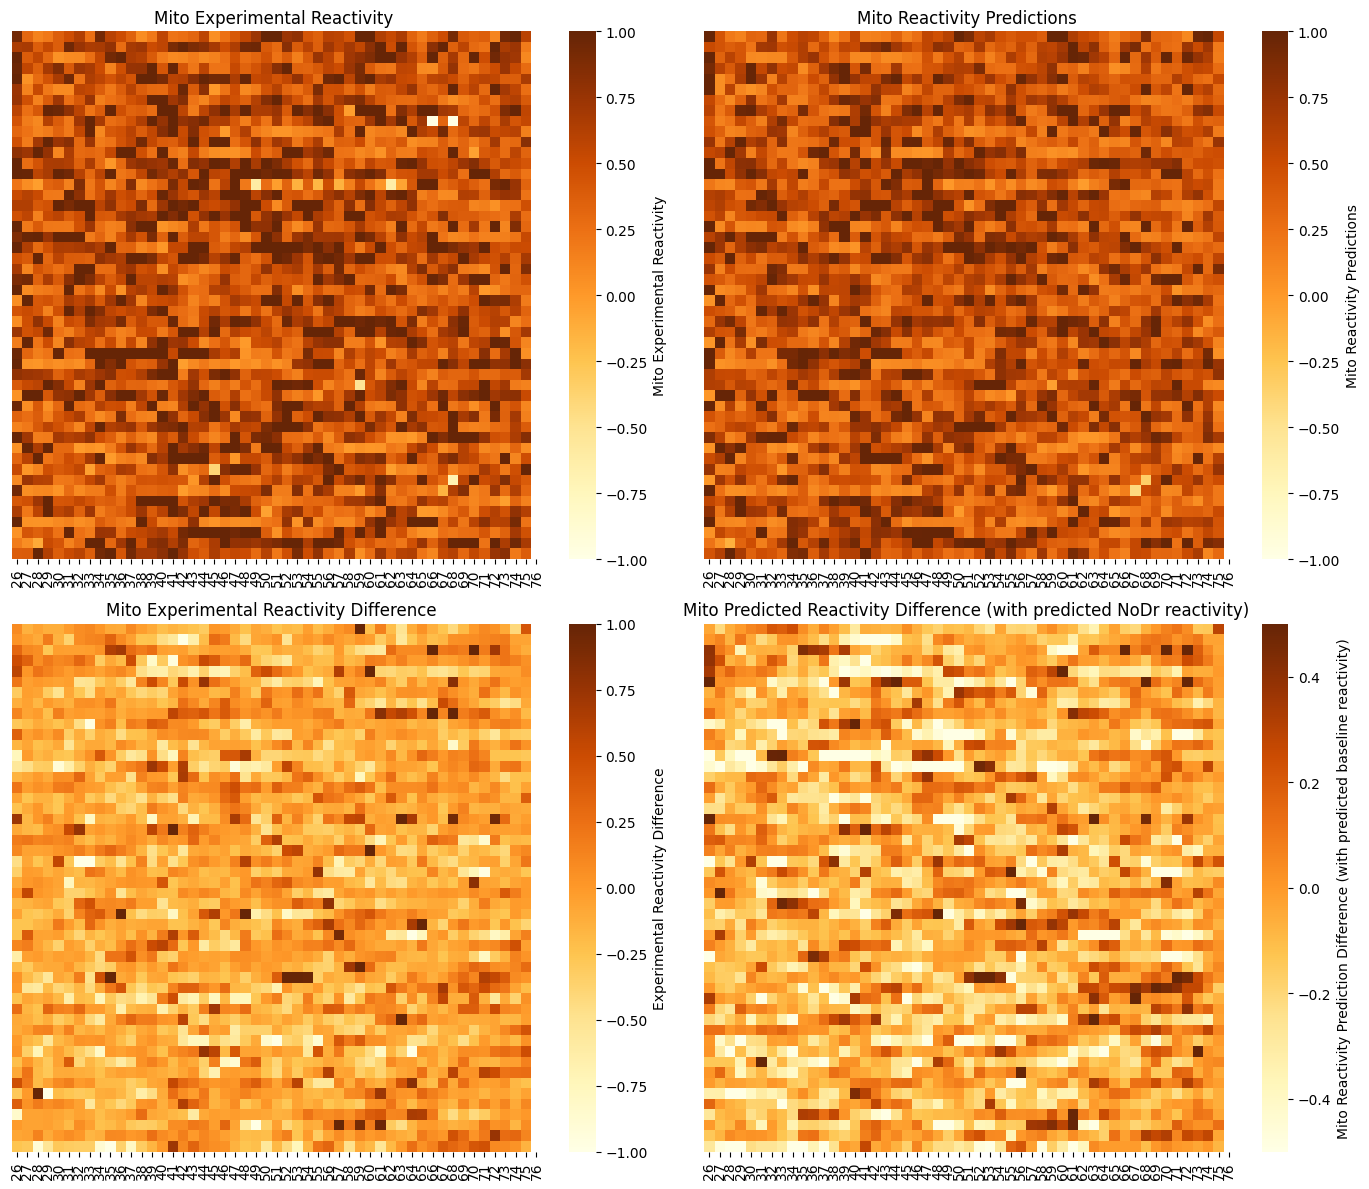

In [28]:

#Trying to Hide the code

df = df[0:50] #can change the size of the df here (remember to reload "df" two cells above for subsequent changes)
df[drug] = df[drug].apply(lambda x: np.array(eval(x)) if isinstance(x, str) else np.array(x))
df[f'{drug}_pred'] = df[f'{drug}_pred'].apply(lambda x: np.array(eval(x)) if isinstance(x, str) else np.array(x))
df['NoDr'] = df['NoDr'].apply(lambda x: np.array(eval(x)) if isinstance(x, str) else np.array(x))
df['NoDr_pred'] = df['NoDr_pred'].apply(lambda x: np.array(eval(x)) if isinstance(x, str) else np.array(x))



# Compute the differences
df[f'{drug}_reactivity_diff'] = df['NoDr'] - df[drug]
df[f'{drug}_pred_diff'] = df['NoDr_pred'] - df[f'{drug}_pred']

# Create a subplot for four heatmaps (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Define the colormap and color normalization
cmap = 'YlOrBr'  # Warm orange gradient
vmin = -1
  # Min value for consistent color scaling
vmax = 1
  # Max value for consistent color scaling

# Plot the heatmap for 'reactivity'
sns.heatmap(
    np.vstack(df[drug].values),  # Stack the list values to create the heatmap matrix
    ax=axes[0, 0],
    cmap=cmap,
    cbar_kws={'label': f'{drug} Experimental Reactivity'},
    xticklabels=np.arange(26, 77),  # Nucleotide positions from 26 to 76
    yticklabels=False,  # No y-axis labels
    annot=False,  # No annotations
    fmt='.2f',  # Format of the numbers if annot=True
    vmin=vmin,  # Consistent color scaling across all heatmaps
    vmax=vmax,
)
axes[0, 0].set_title(f'{drug} Experimental Reactivity')

# Plot the heatmap for 'argi_clip_preds'
sns.heatmap(
    np.vstack(df[f'{drug}_pred'].values),  # Stack the list values for 'argi_clip_preds'
    ax=axes[0, 1],
    cmap=cmap,
    cbar_kws={'label': f'{drug} Reactivity Predictions'},
    xticklabels=np.arange(26, 77),  # Nucleotide positions from 26 to 76
    yticklabels=False,  # No y-axis labels
    annot=False,
    fmt='.2f',
    vmin=vmin,  # Consistent color scaling across all heatmaps
    vmax=vmax,
)
axes[0, 1].set_title(f'{drug} Reactivity Predictions')

# Plot the heatmap for 'reactivity_diff'
sns.heatmap(
    np.vstack(df[f'{drug}_reactivity_diff'].values),  # Stack the list values to create the heatmap matrix for differences
    ax=axes[1, 0],
    cmap=cmap,
    cbar_kws={'label': 'Experimental Reactivity Difference'},
    xticklabels=np.arange(26, 77),  # Nucleotide positions from 26 to 76
    yticklabels=False,  # No y-axis labels
    annot=False,  # No annotations
    fmt='.2f',  # Format of the numbers if annot=True
    vmin=vmin,  # Consistent color scaling across all heatmaps
    vmax=vmax,
)
axes[1, 0].set_title(f'{drug} Experimental Reactivity Difference ')

# Plot the heatmap for 'argi_clip_preds_diff'
sns.heatmap(
    np.vstack(df[f'{drug}_pred_diff'].values),  # Stack the list values for 'argi_clip_preds_diff'
    ax=axes[1, 1],
    cmap=cmap,
    cbar_kws={'label': f'{drug} Reactivity Prediction Difference (with predicted baseline reactivity)'},
    xticklabels=np.arange(26, 77),  # Nucleotide positions from 26 to 76
    yticklabels=False,  # No y-axis labels
    annot=False,
    fmt='.2f',
    vmin=-0.5,  # Consistent color scaling across all heatmaps
    vmax=0.5,
)
axes[1, 1].set_title(f'{drug} Predicted Reactivity Difference (with predicted NoDr reactivity)')


# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## RibonanzaNet-SM_003
* Same training data, cutoffs, and epoch number as for RibonanzaNet-SM_002, but with training on MCRSE mean column root squared error.
* model saved as: RibonanzaNet-SM_003.pt
* sbatch script: sm_train_all_simultaneously.sbatch.sh
* Sherlock Job #: 56074448

In [29]:
df = pd.read_json('RibonanzaNet-SM_003_test_data_with_preds.json')

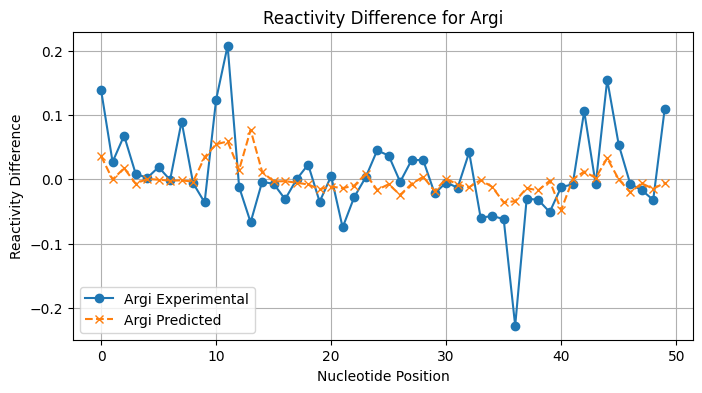

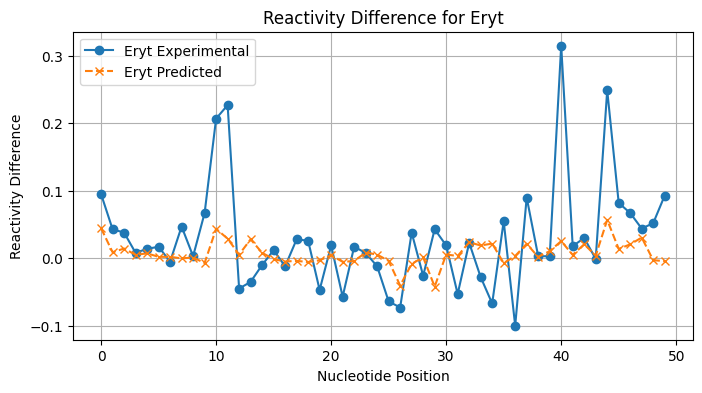

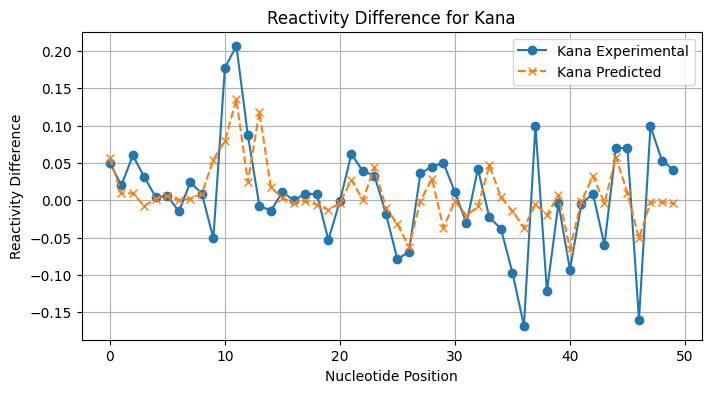

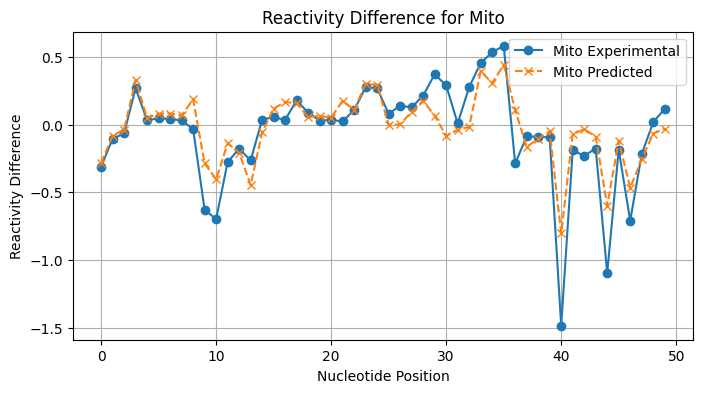

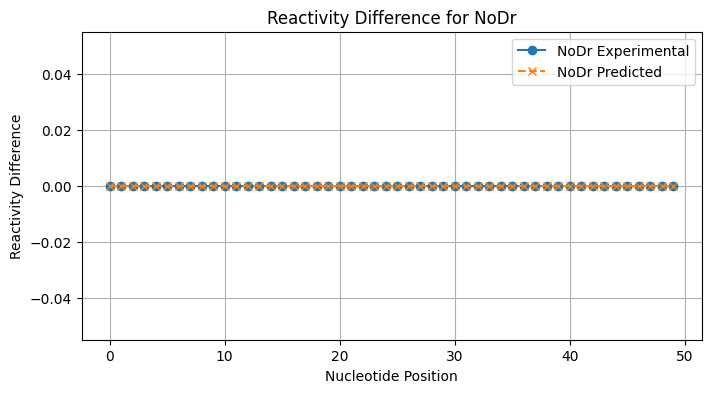

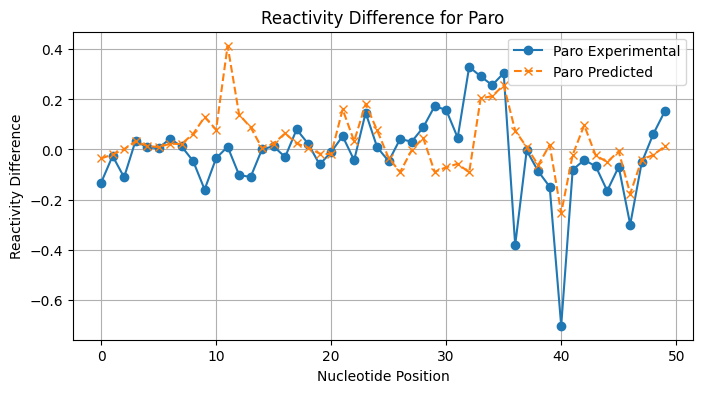

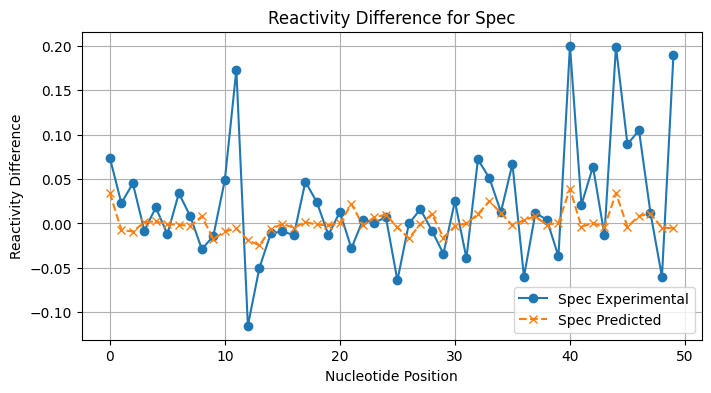

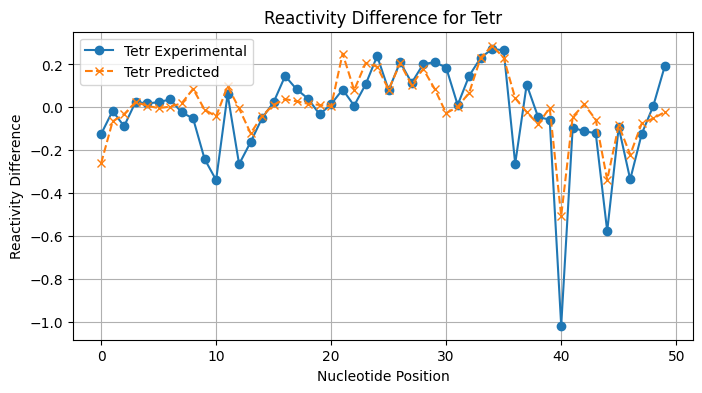

In [30]:
def plot_reactivity_differences(entry):
    """
    Plots the reactivity difference for each condition in a given RNA dataset entry.

    Parameters:
    entry (pd.Series): A single row of the RNA dataset.

    Returns:
    None
    """
    conditions = ['Argi', 'Eryt', 'Kana', 'Mito', 'NoDr', 'Paro', 'Spec', 'Tetr']

    # Create plots for each condition
    for condition in conditions:
        exp_reactivity = np.array(entry[condition])  # Experimental reactivity
        pred_reactivity = np.array(entry[f"{condition}_pred"])  # Predicted reactivity
        reactivity_diff = exp_reactivity - np.array(entry['NoDr'])  # Experimental difference
        pred_diff = pred_reactivity - np.array(entry['NoDr_pred'])  # Predicted difference

        x_positions = np.arange(len(exp_reactivity))  # Nucleotide positions

        plt.figure(figsize=(8, 4))
        plt.plot(x_positions, reactivity_diff, label=f'{condition} Experimental', linestyle='-', marker='o')
        plt.plot(x_positions, pred_diff, label=f'{condition} Predicted', linestyle='--', marker='x')

        plt.xlabel('Nucleotide Position')
        plt.ylabel('Reactivity Difference')
        plt.title(f'Reactivity Difference for {condition}')
        plt.legend()
        plt.grid(True)
        plt.show()

# Example usage:
# Assume df is your dataframe and you want to plot for the first entry
plot_reactivity_differences(df.iloc[2])


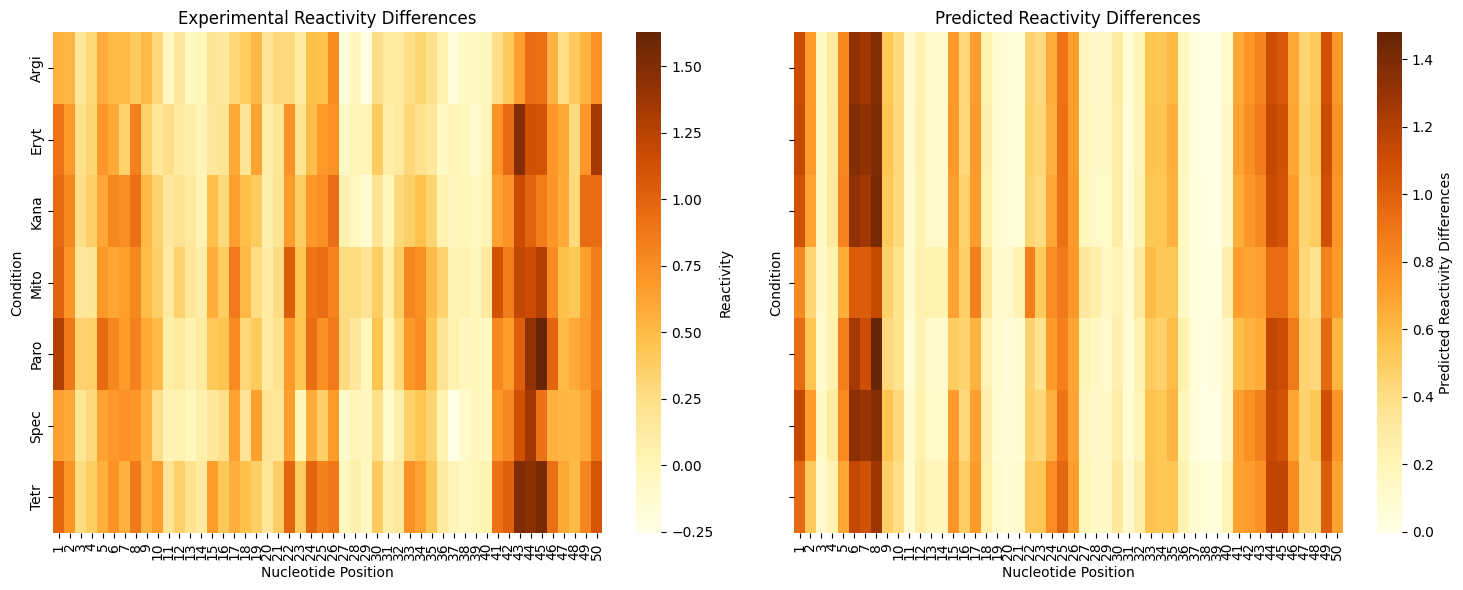

In [31]:
def plot_side_by_side_heatmaps(entry):
    """
    Generate side-by-side heatmaps for reactivities and predictions for a given entry.

    Parameters:
    entry (pd.Series): A single row of the RNA dataset.

    Returns:
    None
    """
    conditions = ['Argi', 'Eryt', 'Kana', 'Mito', 'Paro', 'Spec', 'Tetr']
    sequence_length = len(entry[conditions[0]])  # Assuming all conditions have the same sequence length

    # Prepare data for the heatmaps
    reactivity_data = np.array([entry[cond] for cond in conditions])
    prediction_data = np.array([entry[f"{cond}_pred"] for cond in conditions])

    # Set up the figure and subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

    # Heatmap for experimental reactivities
    sns.heatmap(
        reactivity_data,
        ax=axes[0],
        cmap="YlOrBr",
        xticklabels=np.arange(1, sequence_length + 1),
        yticklabels=conditions,
        cbar_kws={'label': 'Reactivity'}
    )
    axes[0].set_title("Experimental Reactivity Differences")
    axes[0].set_xlabel("Nucleotide Position")
    axes[0].set_ylabel("Condition")

    # Heatmap for predicted reactivities
    sns.heatmap(
        prediction_data,
        ax=axes[1],
        cmap="YlOrBr",
        xticklabels=np.arange(1, sequence_length + 1),
        yticklabels=conditions,  # Ensure y-axis labels match on both plots
        cbar_kws={'label': 'Predicted Reactivity Differences'}
    )
    axes[1].set_title("Predicted Reactivity Differences")
    axes[1].set_xlabel("Nucleotide Position")

    # Force y-axis labels to show on both plots
    axes[1].set_ylabel("Condition")  # Explicitly set for right heatmap
    axes[1].tick_params(left=True)  # Ensure ticks are drawn
    axes[1].set_yticks(axes[0].get_yticks())  # Match y-axis ticks with left plot
    axes[1].set_yticklabels(conditions)  # Ensure correct labels

    # Display the heatmaps
    plt.tight_layout()
    plt.show()

plot_side_by_side_heatmaps(df.iloc[38])


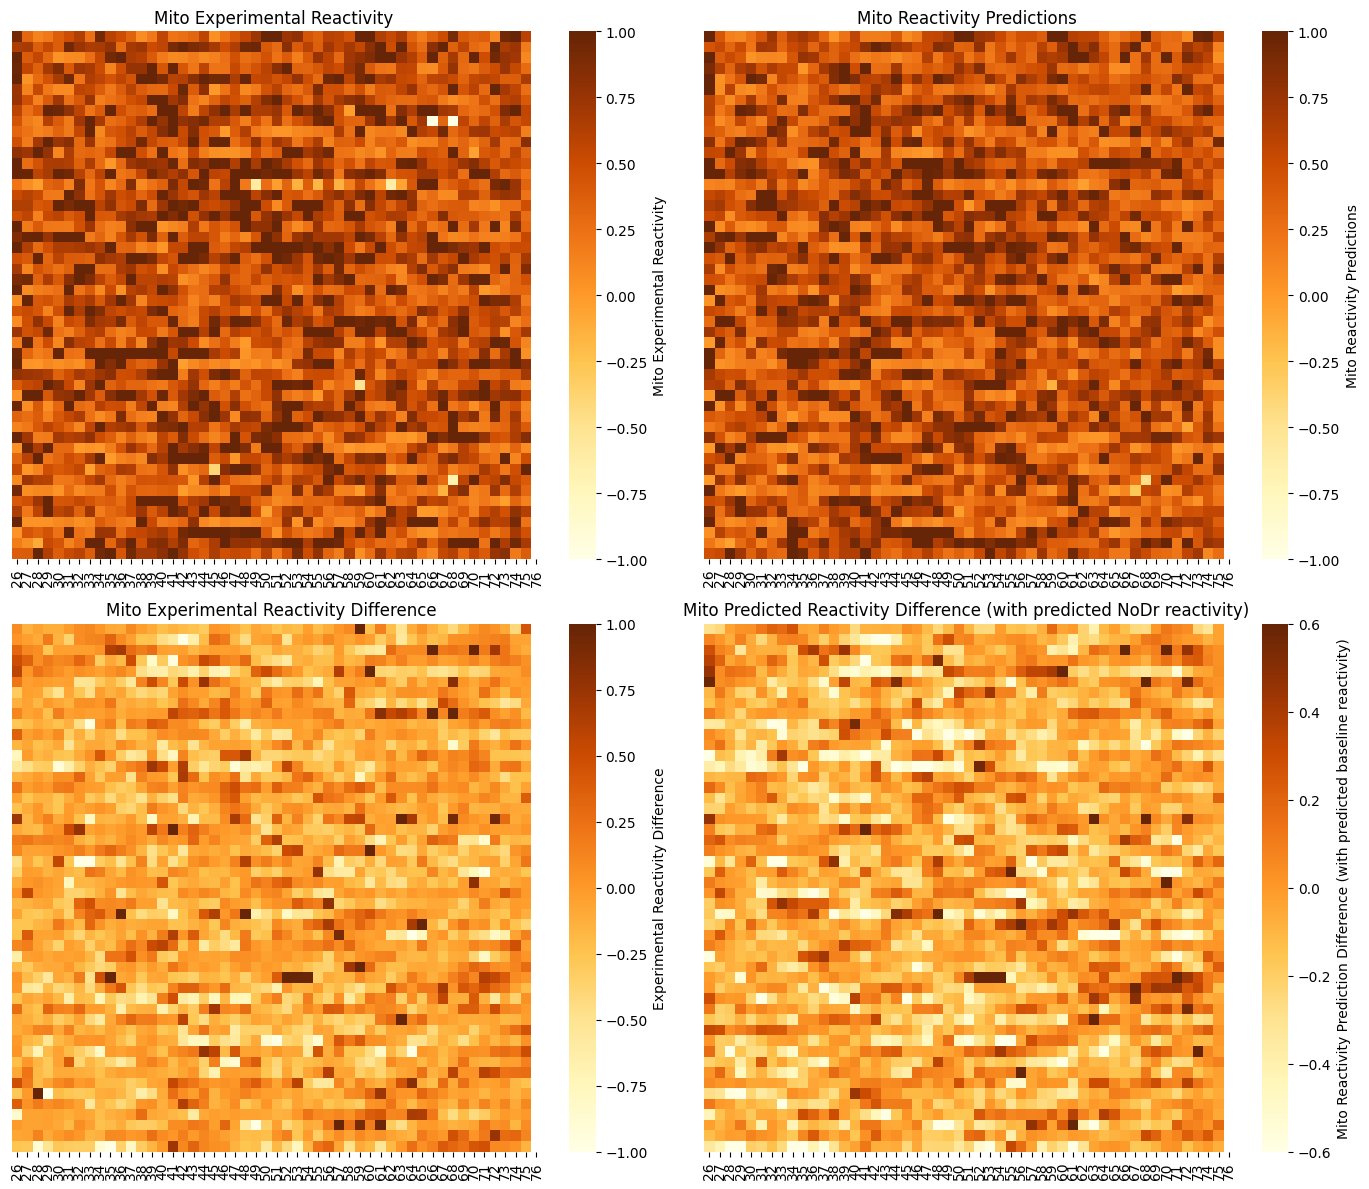

In [32]:
# Limit size of DataFrame and avoid SettingWithCopyWarning
df = df[0:50].copy()  # safe slicing

# Safely convert stringified arrays to numpy arrays
df.loc[:, drug] = df[drug].apply(lambda x: np.array(eval(x)) if isinstance(x, str) else np.array(x))
df.loc[:, f'{drug}_pred'] = df[f'{drug}_pred'].apply(lambda x: np.array(eval(x)) if isinstance(x, str) else np.array(x))
df.loc[:, 'NoDr'] = df['NoDr'].apply(lambda x: np.array(eval(x)) if isinstance(x, str) else np.array(x))
df.loc[:, 'NoDr_pred'] = df['NoDr_pred'].apply(lambda x: np.array(eval(x)) if isinstance(x, str) else np.array(x))

# Compute the differences
df.loc[:, f'{drug}_reactivity_diff'] = df['NoDr'] - df[drug]
df.loc[:, f'{drug}_pred_diff'] = df['NoDr_pred'] - df[f'{drug}_pred']


# Create a subplot for four heatmaps (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Define the colormap and color normalization
cmap = 'YlOrBr'  # Warm orange gradient
vmin = -1
  # Min value for consistent color scaling
vmax = 1
  # Max value for consistent color scaling

# Plot the heatmap for 'reactivity'
sns.heatmap(
    np.vstack(df[drug].values),  # Stack the list values to create the heatmap matrix
    ax=axes[0, 0],
    cmap=cmap,
    cbar_kws={'label': f'{drug} Experimental Reactivity'},
    xticklabels=np.arange(26, 77),  # Nucleotide positions from 26 to 76
    yticklabels=False,  # No y-axis labels
    annot=False,  # No annotations
    fmt='.2f',  # Format of the numbers if annot=True
    vmin=vmin,  # Consistent color scaling across all heatmaps
    vmax=vmax,
)
axes[0, 0].set_title(f'{drug} Experimental Reactivity')

# Plot the heatmap for 'argi_clip_preds'
sns.heatmap(
    np.vstack(df[f'{drug}_pred'].values),  # Stack the list values for 'argi_clip_preds'
    ax=axes[0, 1],
    cmap=cmap,
    cbar_kws={'label': f'{drug} Reactivity Predictions'},
    xticklabels=np.arange(26, 77),  # Nucleotide positions from 26 to 76
    yticklabels=False,  # No y-axis labels
    annot=False,
    fmt='.2f',
    vmin=vmin,  # Consistent color scaling across all heatmaps
    vmax=vmax,
)
axes[0, 1].set_title(f'{drug} Reactivity Predictions')

# Plot the heatmap for 'reactivity_diff'
sns.heatmap(
    np.vstack(df[f'{drug}_reactivity_diff'].values),  # Stack the list values to create the heatmap matrix for differences
    ax=axes[1, 0],
    cmap=cmap,
    cbar_kws={'label': 'Experimental Reactivity Difference'},
    xticklabels=np.arange(26, 77),  # Nucleotide positions from 26 to 76
    yticklabels=False,  # No y-axis labels
    annot=False,  # No annotations
    fmt='.2f',  # Format of the numbers if annot=True
    vmin=vmin,  # Consistent color scaling across all heatmaps
    vmax=vmax,
)
axes[1, 0].set_title(f'{drug} Experimental Reactivity Difference ')

# Plot the heatmap for 'argi_clip_preds_diff'
sns.heatmap(
    np.vstack(df[f'{drug}_pred_diff'].values),  # Stack the list values for 'argi_clip_preds_diff'
    ax=axes[1, 1],
    cmap=cmap,
    cbar_kws={'label': f'{drug} Reactivity Prediction Difference (with predicted baseline reactivity)'},
    xticklabels=np.arange(26, 77),  # Nucleotide positions from 26 to 76
    yticklabels=False,  # No y-axis labels
    annot=False,
    fmt='.2f',
    vmin=-0.6,  # Consistent color scaling across all heatmaps
    vmax=0.6,
)
axes[1, 1].set_title(f'{drug} Predicted Reactivity Difference (with predicted NoDr reactivity)')


# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## RibonanzaNet-SM_004

Same sequences used for train/val/test split as 002 and 003.

Finetuning RibonanzaNet on just the reactivity *differences* of all conditions at once (NOT including NoDr baseline) results
* From training on 2094 sequences, split training data into training and validation data.
* criterion: MAE
* epochs: 20
* train_snr_cutoff: 1
* val_snr_cutoff: 1
* training_script: SM_train_reac_diff_only.py
* training data: rdiff_train.json
* validation data: rdiff_val.json
* test data: rdiff_test.json
* model saved as: RibonanzaNet-SM_004.pt
* sbatch script: sm_train_all_reac_diff_simultaneously.sbatch.sh
* Sherlock Job #: **56196107**

In [33]:
df = pd.read_json('RibonanzaNet-SM_004_test_data_with_rdiff_preds.json')

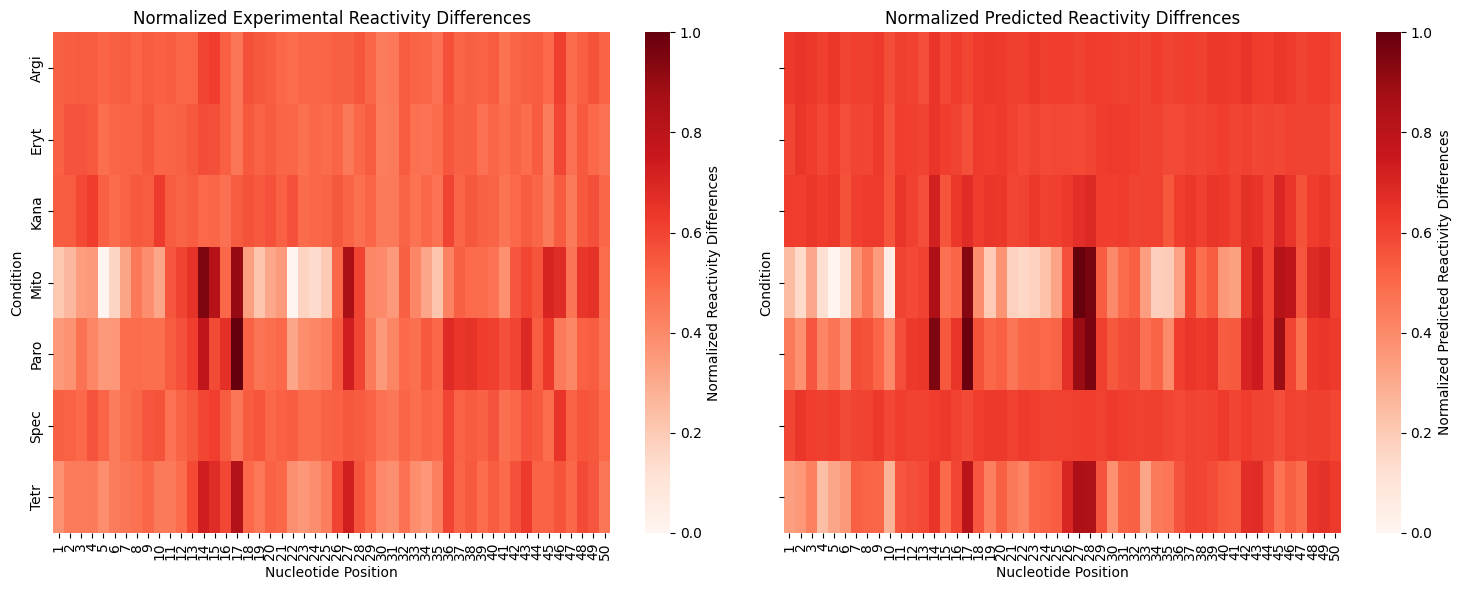

In [34]:
def normalize_reactivity(data):
    """
    Normalize the reactivity differences to a 0-1 scale.

    Parameters:
    data (np.ndarray): A 2D array of reactivities from all conditions.

    Returns:
    np.ndarray: Normalized reactivity values.
    """
    min_val = np.min(data)
    max_val = np.max(data)

    # Avoid division by zero in case all values are the same
    if max_val == min_val:
        return np.zeros_like(data)

    return (data - min_val) / (max_val - min_val)

def plot_side_by_side_heatmaps(entry):
    """
    Generate side-by-side heatmaps for reactivities and predictions for a given entry,
    after normalizing all conditions to a 0-1 scale.

    Parameters:
    entry (pd.Series): A single row of the RNA dataset.

    Returns:
    None
    """
    conditions = ['Argi', 'Eryt', 'Kana', 'Mito', 'Paro', 'Spec', 'Tetr']
    sequence_length = len(entry[conditions[0]])  # Assuming all conditions have the same sequence length

    # Extract raw reactivity and predicted data
    reactivity_data = np.array([entry[cond] for cond in conditions])
    prediction_data = np.array([entry[f"{cond}_pred_rdiff"] for cond in conditions])

    # Normalize the reactivity differences to the range [0,1]
    reactivity_data_normalized = normalize_reactivity(reactivity_data)
    prediction_data_normalized = normalize_reactivity(prediction_data)

    # Set up the figure and subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

    # Heatmap for experimental reactivities (normalized)
    sns.heatmap(
        reactivity_data_normalized,
        ax=axes[0],
        cmap="Reds",
        xticklabels=np.arange(1, sequence_length + 1),
        yticklabels=conditions,
        cbar_kws={'label': 'Normalized Reactivity Differences'},
        vmin=0, vmax=1  # Force 0-1 scaling for color consistency
    )
    axes[0].set_title("Normalized Experimental Reactivity Differences")
    axes[0].set_xlabel("Nucleotide Position")
    axes[0].set_ylabel("Condition")

    # Heatmap for predicted reactivities (normalized)
    sns.heatmap(
        prediction_data_normalized,
        ax=axes[1],
        cmap="Reds",
        xticklabels=np.arange(1, sequence_length + 1),
        yticklabels=conditions,
        cbar_kws={'label': 'Normalized Predicted Reactivity Differences'},
        vmin=0, vmax=1  # Same fixed color scaling
    )
    axes[1].set_title("Normalized Predicted Reactivity Diffrences")
    axes[1].set_xlabel("Nucleotide Position")
    axes[1].set_ylabel("Condition")
    axes[1].tick_params(left=True)
    axes[1].set_yticks(axes[0].get_yticks())
    axes[1].set_yticklabels(conditions)

    # Display the heatmaps
    plt.tight_layout()
    plt.show()

plot_side_by_side_heatmaps(df.iloc[13])


In [35]:
drug = input('Insert drug of interest here: ')

Insert drug of interest here: Mito


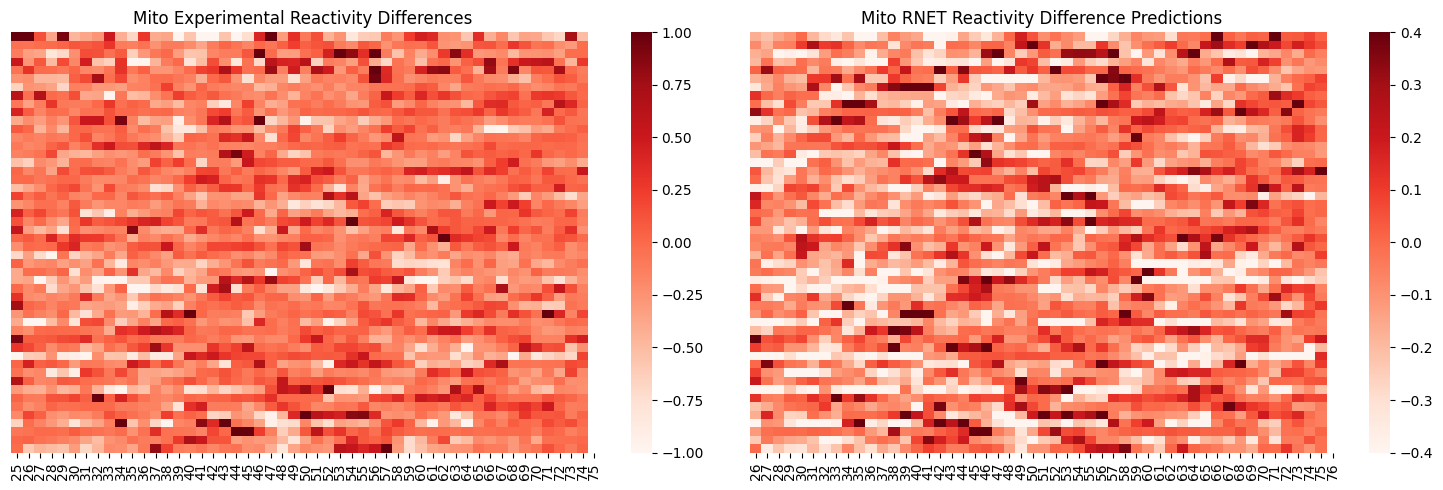

In [36]:
# Safely slice and avoid SettingWithCopyWarning
df_2 = df[50:100].copy()

# Apply conversions safely
df_2.loc[:, drug] = df_2[drug].apply(lambda x: np.array(eval(x)) if isinstance(x, str) else np.array(x))
df_2.loc[:, f'{drug}_pred_rdiff'] = df_2[f'{drug}_pred_rdiff'].apply(lambda x: np.array(eval(x)) if isinstance(x, str) else np.array(x))

# Create a subplot for four heatmaps (2 rows, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Define the colormap and color normalization
cmap = 'Reds'  # Warm orange gradient
vmin = -1
  # Min value for consistent color scaling
vmax = 1
  # Max value for consistent color scaling

# Plot the heatmap for 'reactivity'
sns.heatmap(
    np.vstack(df_2[drug].values),  # Stack the list values to create the heatmap matrix
    ax=axes[0],
    cmap=cmap,
    #cbar_kws={'label': f'{drug} Experimental Reactivity Differences'},
    xticklabels=np.arange(25, 76),  # Nucleotide positions from 26 to 76
    yticklabels=False,  # No y-axis labels
    annot=False,  # No annotations
    fmt='.2f',  # Format of the numbers if annot=True
    vmin=vmin,  # Consistent color scaling across all heatmaps
    vmax=vmax,
)
axes[0].set_title(f'{drug} Experimental Reactivity Differences')

# Plot the heatmap for 'argi_clip_preds'
sns.heatmap(
    np.vstack(df_2[f'{drug}_pred_rdiff'].values),  # Stack the list values for 'argi_clip_preds'
    ax=axes[1],
    cmap=cmap,
    #cbar_kws={'label': f'{drug} RNET Reactivity Difference Predictions'},
    xticklabels=np.arange(26, 77),  # Nucleotide positions from 26 to 76
    yticklabels=False,  # No y-axis labels
    annot=False,
    fmt='.2f',
    vmin=-0.4,  # Consistent color scaling across all heatmaps
    vmax=0.4,
)
axes[1].set_title(f'{drug} RNET Reactivity Difference Predictions')



# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## RibonanzaNet-SM_005

Notes: Trained on all reactivity differences, *and* the absolute NoDr reactivity simultaneously.

* Job ID: 56196343
* From training on 2094 sequences, split training data into training and validation data.
* criterion: MAE
* epochs: 20
* train_snr_cutoff: 1
* val_snr_cutoff: 1
* training_script: SM_train_model_sim.py
* training data: rdiff_with_NoDr_abs_train.json
* validation data: rdiff_with_NoDr_abs_val.json
* test data: rdiff_with_NoDr_abs_test.json
* model saved as: RibonanzaNet-SM_005.pt
* sbatch script: sm_train_all_reac_diff_with_NoDr_abs.sbatch.sh
* Sherlock Job #: **56196343**



In [37]:
df = pd.read_json('RibonanzaNet-SM_005_test_data_with_preds.json')

In [38]:
df.columns

Index(['id', 'sequence', 'Argi', 'Eryt', 'Kana', 'Mito', 'NoDr', 'Paro',
       'Spec', 'Tetr', 'Argi_SN', 'Eryt_SN', 'Kana_SN', 'Mito_SN', 'NoDr_SN',
       'Paro_SN', 'Spec_SN', 'Tetr_SN', 'Argi_pred', 'Eryt_pred', 'Kana_pred',
       'Mito_pred', 'Paro_pred', 'Spec_pred', 'Tetr_pred', 'NoDr_pred'],
      dtype='object')

In [39]:
drug = input('input drug of interest here: ')

input drug of interest here: Mito


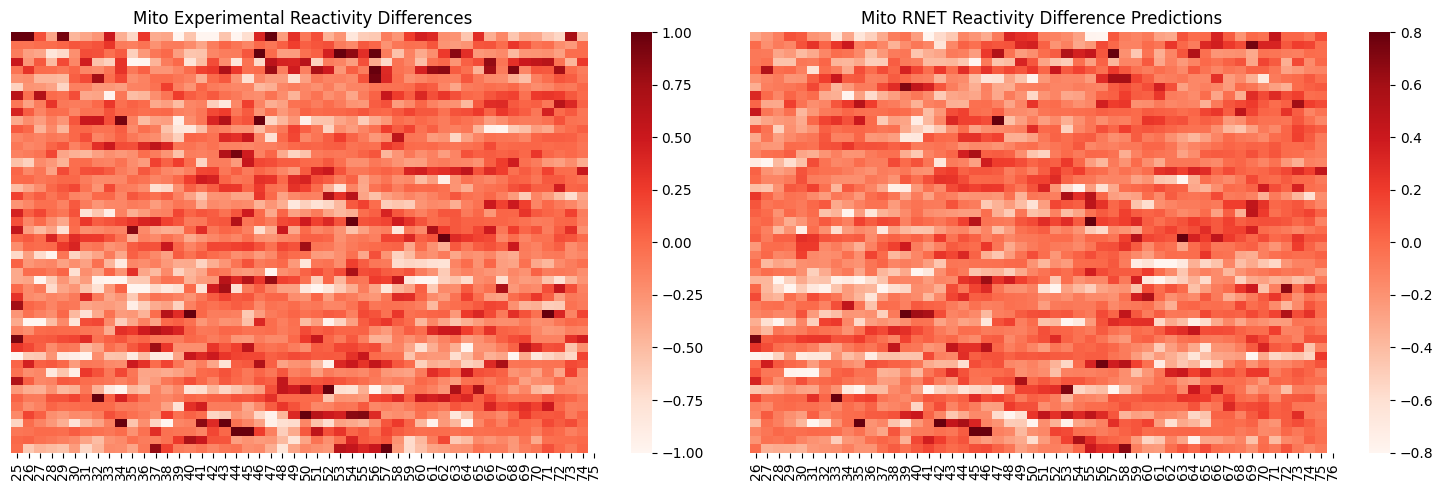

In [40]:
# Safely slice and avoid SettingWithCopyWarning
df = df[50:100].copy()

# Apply conversions safely
df.loc[:, drug] = df[drug].apply(lambda x: np.array(eval(x)) if isinstance(x, str) else np.array(x))
df.loc[:, f'{drug}_pred'] = df[f'{drug}_pred'].apply(lambda x: np.array(eval(x)) if isinstance(x, str) else np.array(x))

# Create a subplot for four heatmaps (2 rows, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Define the colormap and color normalization
cmap = 'Reds'  # Warm orange gradient
vmin = -1
  # Min value for consistent color scaling
vmax = 1
  # Max value for consistent color scaling

# Plot the heatmap for 'reactivity'
sns.heatmap(
    np.vstack(df[drug].values),  # Stack the list values to create the heatmap matrix
    ax=axes[0],
    cmap=cmap,
    #cbar_kws={'label': f'{drug} Experimental Reactivity Differences'},
    xticklabels=np.arange(25, 76),  # Nucleotide positions from 26 to 76
    yticklabels=False,  # No y-axis labels
    annot=False,  # No annotations
    fmt='.2f',  # Format of the numbers if annot=True
    vmin=vmin,  # Consistent color scaling across all heatmaps
    vmax=vmax,
)
axes[0].set_title(f'{drug} Experimental Reactivity Differences')

# Plot the heatmap for 'argi_clip_preds'
sns.heatmap(
    np.vstack(df[f'{drug}_pred'].values),  # Stack the list values for 'argi_clip_preds'
    ax=axes[1],
    cmap=cmap,
    #cbar_kws={'label': f'{drug} RNET Reactivity Difference Predictions'},
    xticklabels=np.arange(26, 77),  # Nucleotide positions from 26 to 76
    yticklabels=False,  # No y-axis labels
    annot=False,
    fmt='.2f',
    vmin=-0.8,  # Consistent color scaling across all heatmaps
    vmax=0.8,
)
axes[1].set_title(f'{drug} RNET Reactivity Difference Predictions')



# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [41]:
df.columns

Index(['id', 'sequence', 'Argi', 'Eryt', 'Kana', 'Mito', 'NoDr', 'Paro',
       'Spec', 'Tetr', 'Argi_SN', 'Eryt_SN', 'Kana_SN', 'Mito_SN', 'NoDr_SN',
       'Paro_SN', 'Spec_SN', 'Tetr_SN', 'Argi_pred', 'Eryt_pred', 'Kana_pred',
       'Mito_pred', 'Paro_pred', 'Spec_pred', 'Tetr_pred', 'NoDr_pred'],
      dtype='object')

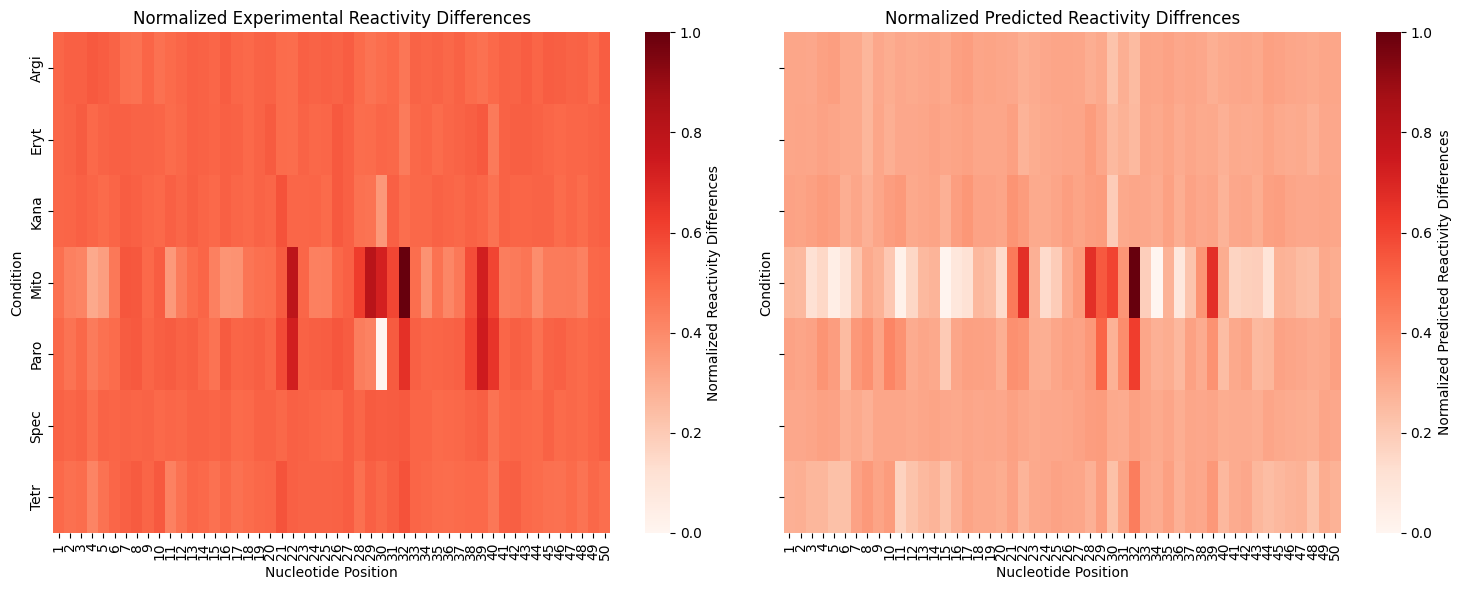

In [42]:
def normalize_reactivity(data):
    """
    Normalize the reactivity differences to a 0-1 scale.

    Parameters:
    data (np.ndarray): A 2D array of reactivities from all conditions.

    Returns:
    np.ndarray: Normalized reactivity values.
    """
    min_val = np.min(data)
    max_val = np.max(data)

    # Avoid division by zero in case all values are the same
    if max_val == min_val:
        return np.zeros_like(data)

    return (data - min_val) / (max_val - min_val)

def plot_side_by_side_heatmaps(entry):
    """
    Generate side-by-side heatmaps for reactivities and predictions for a given entry,
    after normalizing all conditions to a 0-1 scale.

    Parameters:
    entry (pd.Series): A single row of the RNA dataset.

    Returns:
    None
    """
    conditions = ['Argi', 'Eryt', 'Kana', 'Mito', 'Paro', 'Spec', 'Tetr']
    sequence_length = len(entry[conditions[0]])  # Assuming all conditions have the same sequence length

    # Extract raw reactivity and predicted data
    reactivity_data = np.array([entry[cond] for cond in conditions])
    prediction_data = np.array([entry[f"{cond}_pred"] for cond in conditions])

    # Normalize the reactivity differences to the range [0,1]
    reactivity_data_normalized = normalize_reactivity(reactivity_data)
    prediction_data_normalized = normalize_reactivity(prediction_data)

    # Set up the figure and subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

    # Heatmap for experimental reactivities (normalized)
    sns.heatmap(
        reactivity_data_normalized,
        ax=axes[0],
        cmap="Reds",
        xticklabels=np.arange(1, sequence_length + 1),
        yticklabels=conditions,
        cbar_kws={'label': 'Normalized Reactivity Differences'},
        vmin=0, vmax=1  # Force 0-1 scaling for color consistency
    )
    axes[0].set_title("Normalized Experimental Reactivity Differences")
    axes[0].set_xlabel("Nucleotide Position")
    axes[0].set_ylabel("Condition")

    # Heatmap for predicted reactivities (normalized)
    sns.heatmap(
        prediction_data_normalized,
        ax=axes[1],
        cmap="Reds",
        xticklabels=np.arange(1, sequence_length + 1),
        yticklabels=conditions,
        cbar_kws={'label': 'Normalized Predicted Reactivity Differences'},
        vmin=0, vmax=1  # Same fixed color scaling
    )
    axes[1].set_title("Normalized Predicted Reactivity Diffrences")
    axes[1].set_xlabel("Nucleotide Position")
    axes[1].set_ylabel("Condition")
    axes[1].tick_params(left=True)
    axes[1].set_yticks(axes[0].get_yticks())
    axes[1].set_yticklabels(conditions)

    # Display the heatmaps
    plt.tight_layout()
    plt.show()


plot_side_by_side_heatmaps(df.iloc[2]) # can change the index to look at any sequence in the test set 

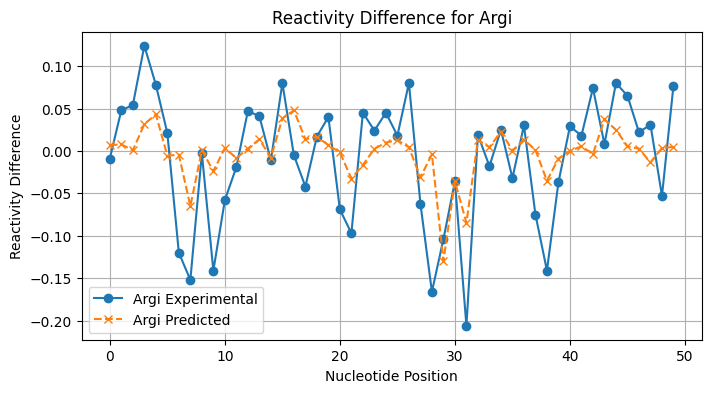

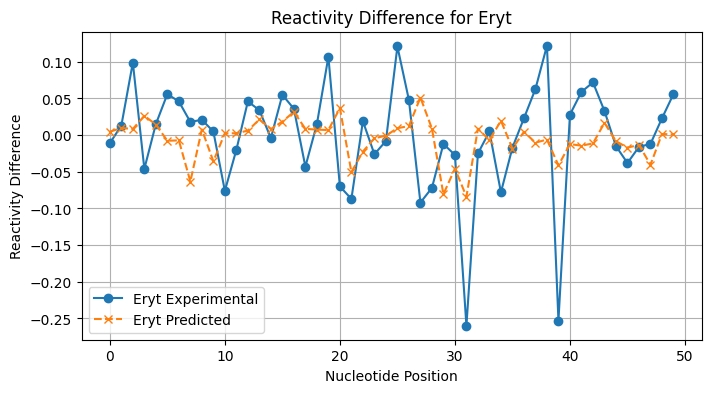

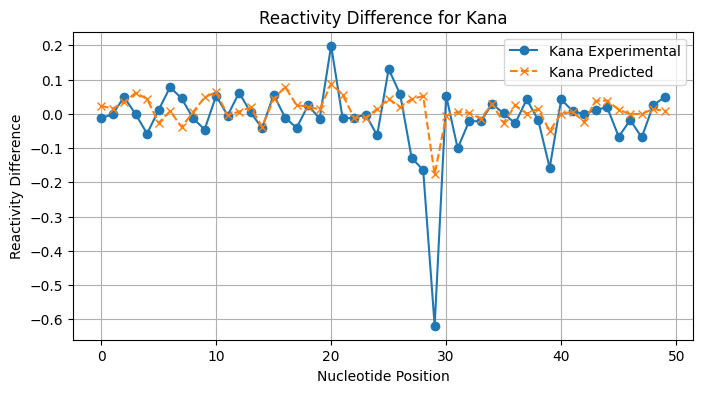

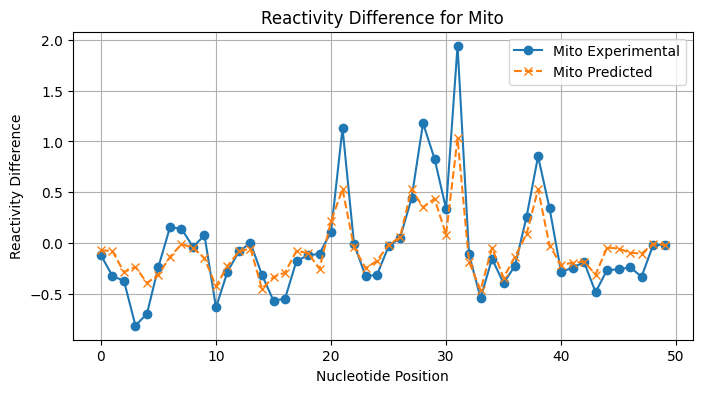

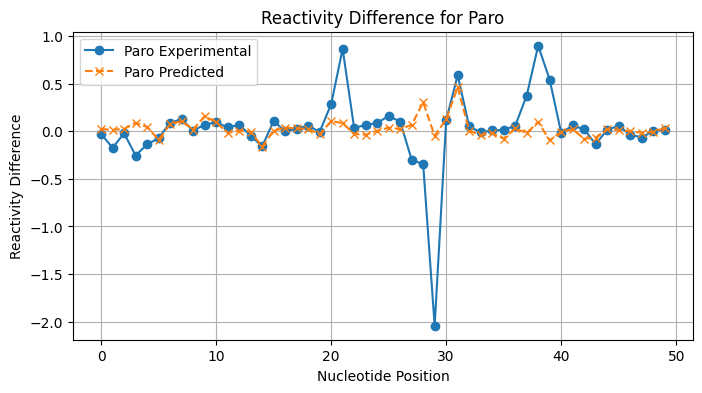

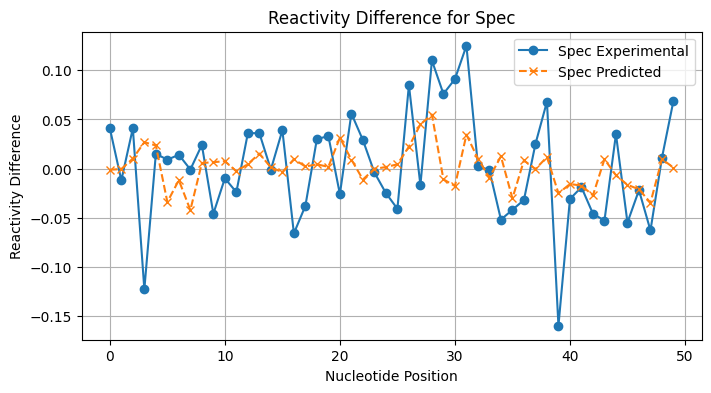

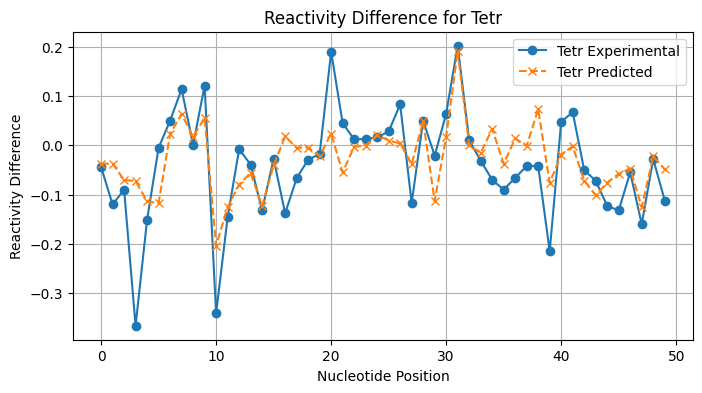

In [43]:
def plot_reactivity_differences(entry):
    """
    Plots the reactivity difference for each condition in a given RNA dataset entry.

    Parameters:
    entry (pd.Series): A single row of the RNA dataset.

    Returns:
    None
    """
    conditions = ['Argi', 'Eryt', 'Kana', 'Mito', 'Paro', 'Spec', 'Tetr']

    # Create plots for each condition
    for condition in conditions:
        reactivity_diff = np.array(entry[condition])  # Experimental difference
        pred_diff = np.array(entry[f"{condition}_pred"])   # Predicted difference

        x_positions = np.arange(len(reactivity_diff))  # Nucleotide positions

        plt.figure(figsize=(8, 4))
        plt.plot(x_positions, reactivity_diff, label=f'{condition} Experimental', linestyle='-', marker='o')
        plt.plot(x_positions, pred_diff, label=f'{condition} Predicted', linestyle='--', marker='x')

        plt.xlabel('Nucleotide Position')
        plt.ylabel('Reactivity Difference')
        plt.title(f'Reactivity Difference for {condition}')
        plt.legend()
        plt.grid(True)
        plt.show()


plot_reactivity_differences(df.iloc[2])